In [68]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import csv

In [69]:
df = pd.read_csv('telco_churn_data.csv')
print(df)
print(type(df))
print(type(df.iloc[0]))
print(type(df.iloc[1, 1]))

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [70]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [74]:
df.shape

(7043, 21)

In [76]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [78]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [80]:
print("Statistics",df.describe())

Statistics        SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


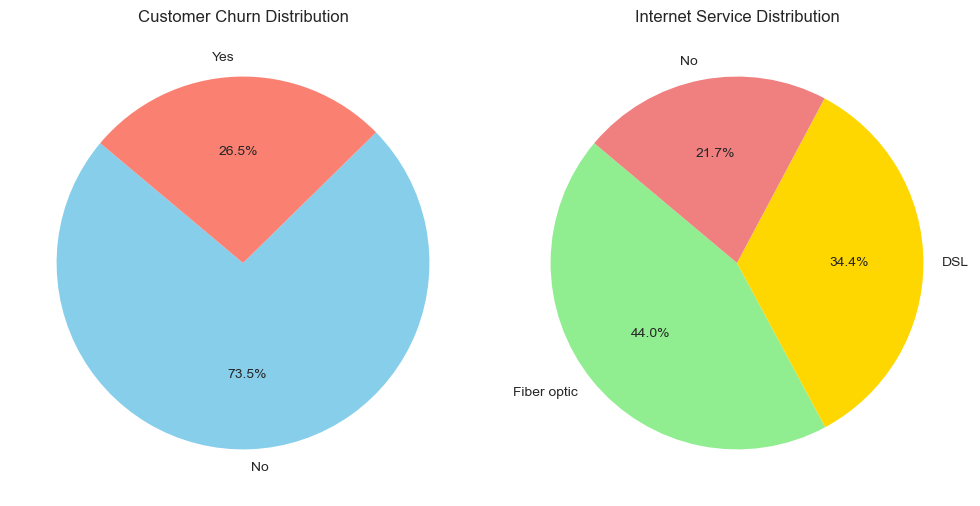

In [107]:
# 1- pie chart analysis

# Set up pie chart for Churn distribution
churn_counts = df['Churn'].value_counts()

# Create a figure for both pie charts
plt.figure(figsize=(10, 5))

# Churn Distribution Pie Chart
plt.subplot(1, 2, 1)
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title("Customer Churn Distribution")

# Set up pie chart for Internet Service distribution
internet_service_counts = df['InternetService'].value_counts()

# Internet Service Distribution Pie Chart
plt.subplot(1, 2, 2)
plt.pie(internet_service_counts, labels=internet_service_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'gold', 'lightcoral'])
plt.title("Internet Service Distribution")

# Display the charts
plt.tight_layout()
plt.show()


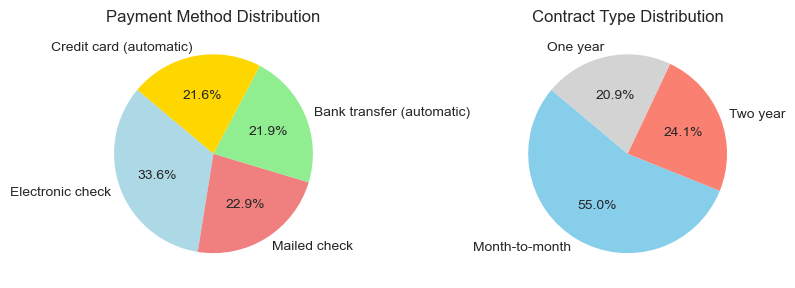

In [105]:
# Payment Method Pie Chart
payment_method_counts = df['PaymentMethod'].value_counts()
plt.subplot(1, 2, 1)
plt.pie(payment_method_counts, labels=payment_method_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title("Payment Method Distribution")

# Contract Type Pie Chart
contract_counts = df['Contract'].value_counts()
plt.subplot(1, 2, 2)
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon', 'lightgrey'])
plt.title("Contract Type Distribution")

# Display the charts
plt.tight_layout()
plt.show()

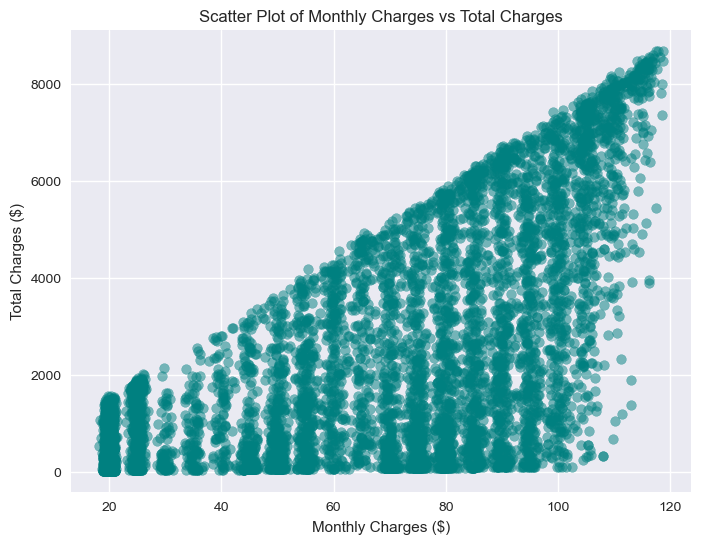

In [112]:
# 2- scatter chart analysis
# Create a scatter plot for Monthly Charges vs Total Charges
plt.figure(figsize=(8, 6))
plt.scatter(df['MonthlyCharges'], df['TotalCharges'], alpha=0.5, color='teal')
plt.title("Scatter Plot of Monthly Charges vs Total Charges")
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Total Charges ($)")
plt.grid(True)
plt.show()

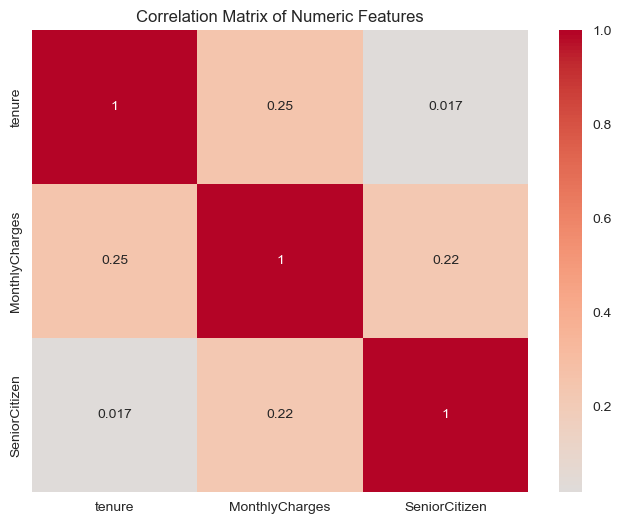

In [109]:
# 3- heatmap analysis

# Correlation heatmap
numeric_cols = ['tenure', 'MonthlyCharges', 'SeniorCitizen']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Features')
plt.show()